## Domaći zadatak 2 - Nenadgledano učenje

### Studenti:
    Đurađ Gvozdenović 1329
    Vesna Stojanović 1339

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

In [2]:
data_df = pd.read_csv("googleplaystore.csv")

In [3]:
data_df.shape

(10840, 13)

In [4]:
data_df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [5]:
data_df.head(5)

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [6]:
def value_counts_two(column):
    value = column.value_counts()
    label = column.value_counts().index
    return label, value

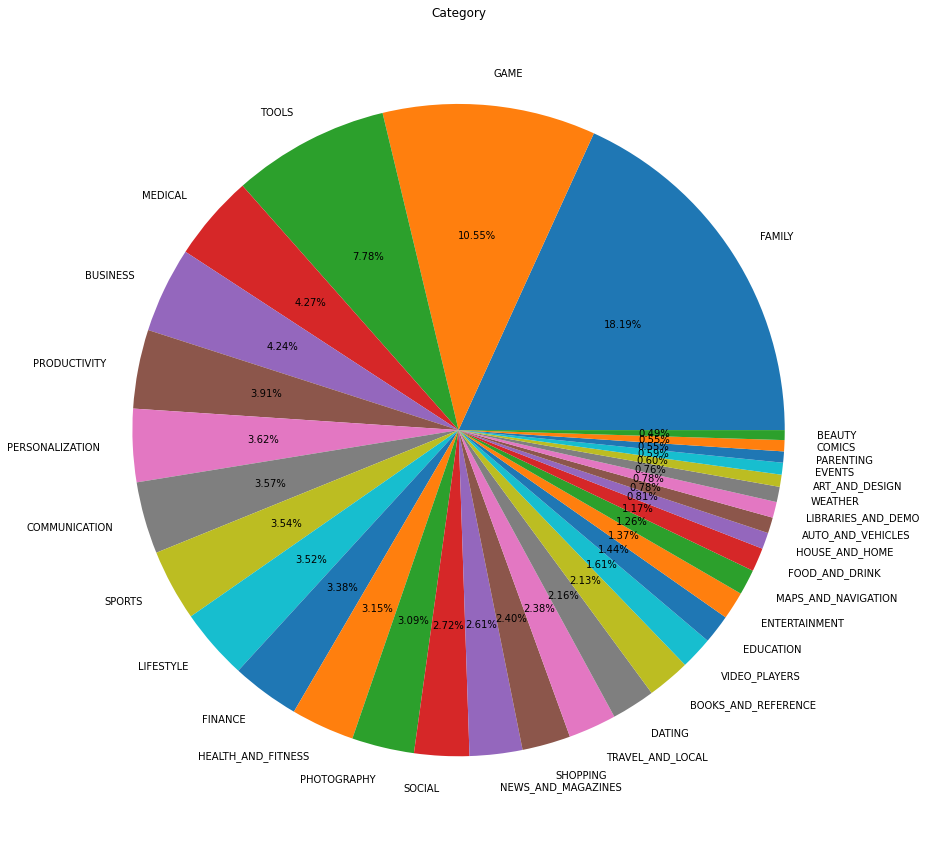

In [7]:
category_labels,category_value = value_counts_two(data_df['Category'])
fig = plt.figure(figsize =(15, 15)) 
plt.pie(category_value, labels = category_labels, autopct='%1.2f%%')
plt.title('Category')
plt.show()

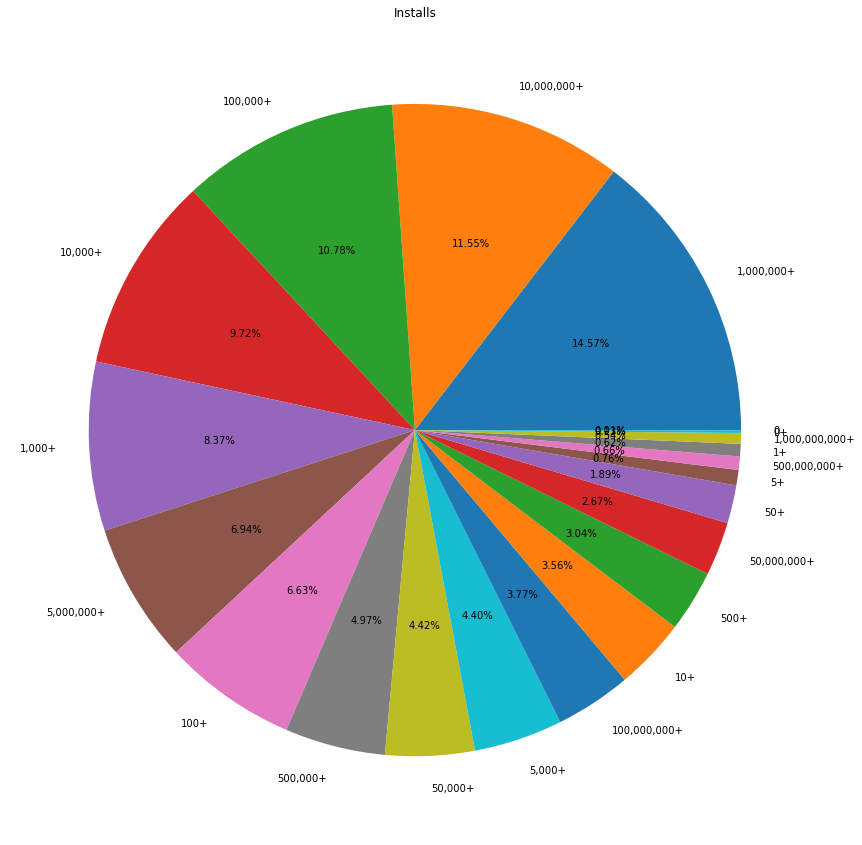

In [8]:
category_labels,category_value = value_counts_two(data_df['Installs'])
fig = plt.figure(figsize =(15, 15)) 
plt.pie(category_value, labels = category_labels, autopct='%1.2f%%')
plt.title('Installs')
plt.show()

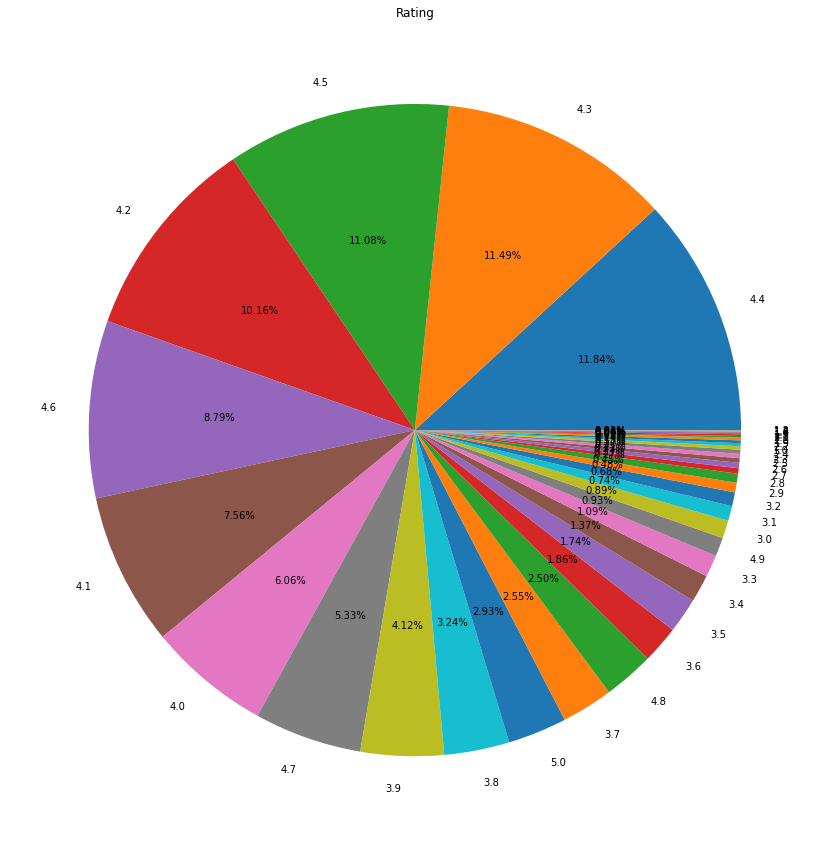

In [9]:
category_labels,category_value = value_counts_two(data_df['Rating'])
fig = plt.figure(figsize =(15, 15)) 
plt.pie(category_value, labels = category_labels, autopct='%1.2f%%')
plt.title('Rating')
plt.show()

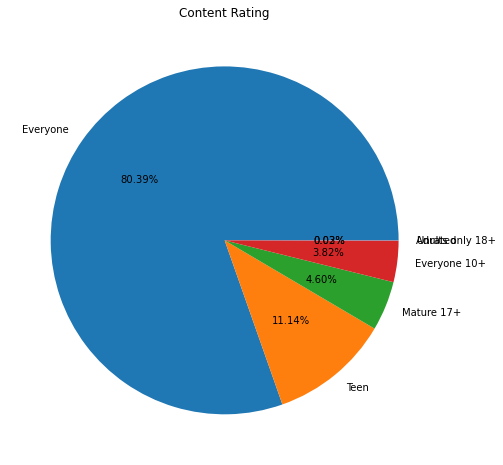

In [10]:
con_rating_labels,con_rating_value = value_counts_two(data_df['Content Rating'])
fig = plt.figure(figsize =(8, 8)) 
plt.pie(con_rating_value, labels = con_rating_labels, autopct='%1.2f%%')
plt.title('Content Rating')
plt.show() 

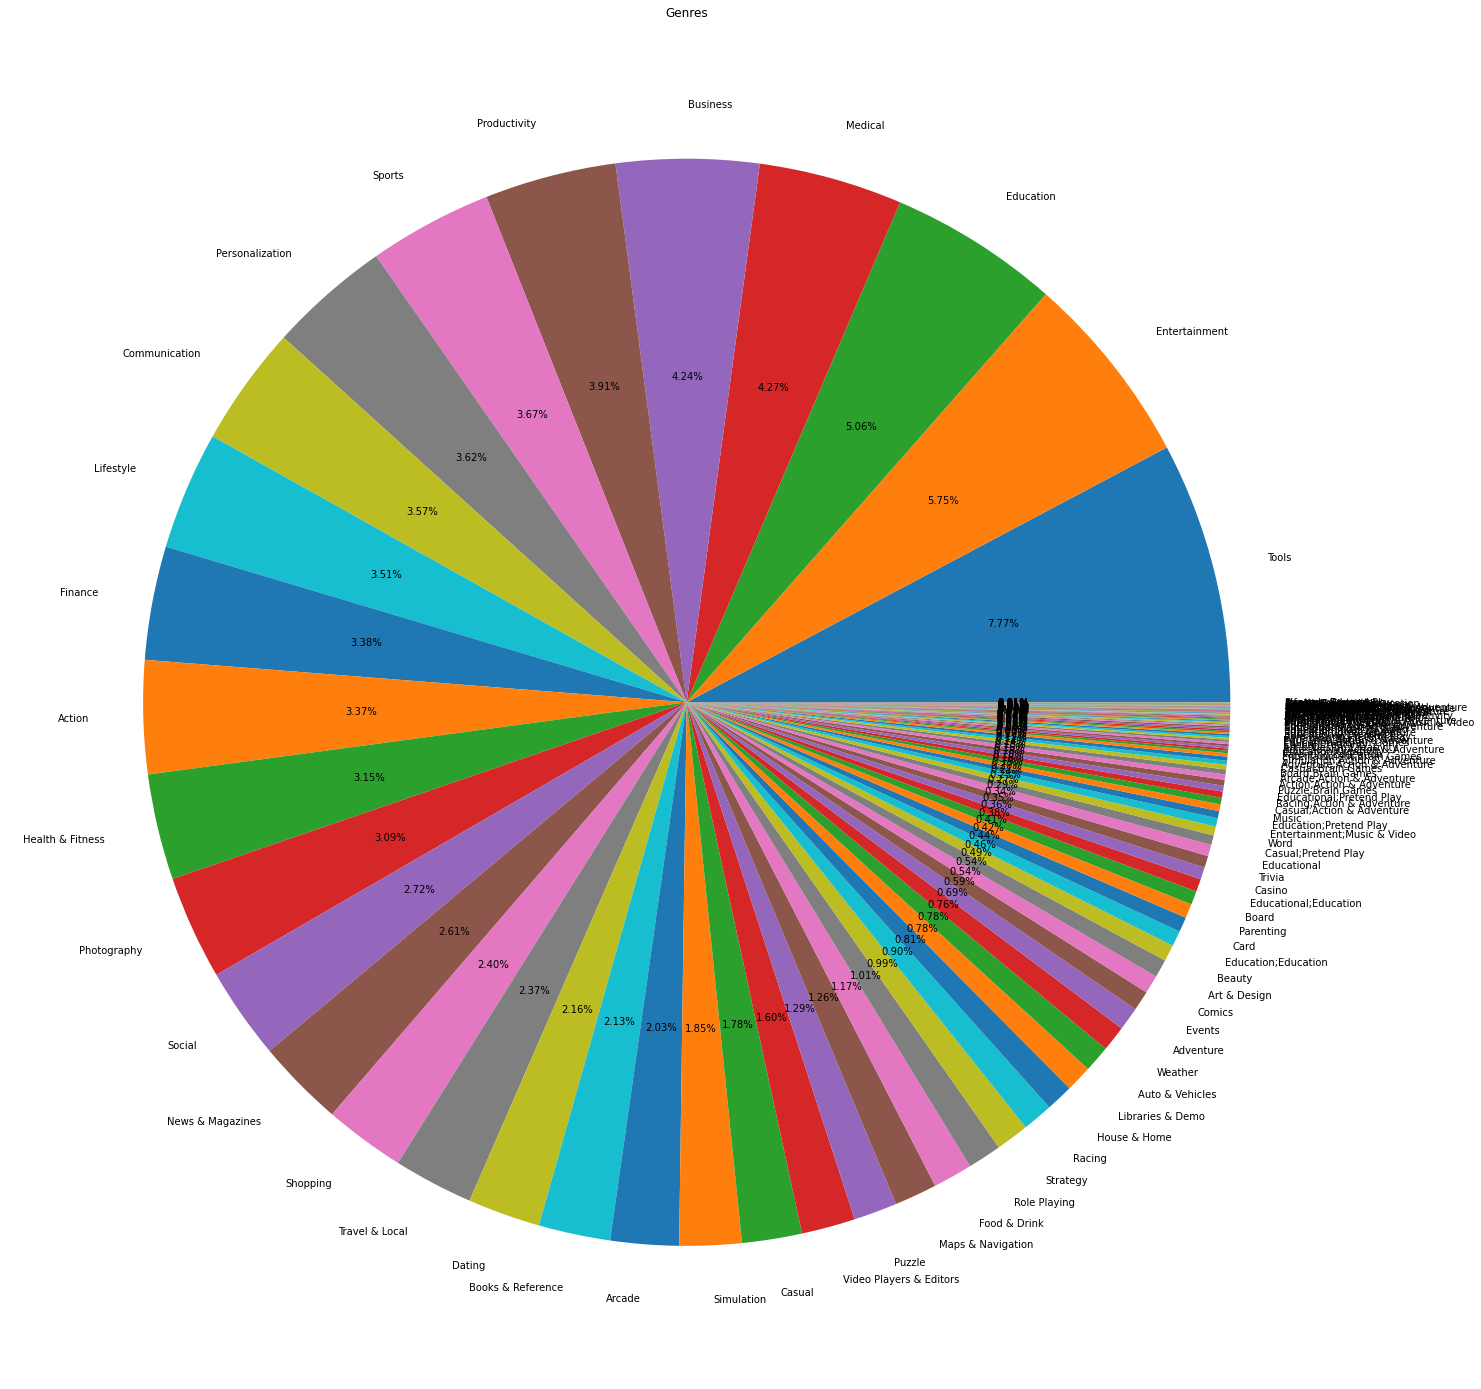

In [16]:
type_labels,type_value = value_counts_two(data_df['Genres'])
plt.figure(figsize =(25, 25))
plt.pie(type_value, labels = type_labels, autopct='%1.2f%%')
plt.title('Genres')
plt.show() 

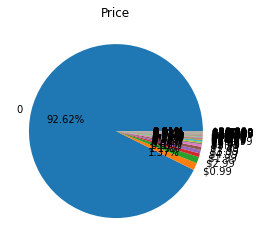

In [12]:
type_labels,type_value = value_counts_two(data_df['Price'])
plt.pie(type_value, labels = type_labels, autopct='%1.2f%%')
plt.title('Price')
plt.show() 

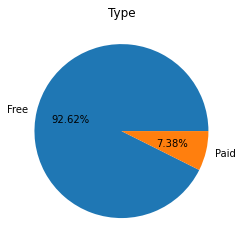

In [13]:
type_labels,type_value = value_counts_two(data_df['Type'])
plt.pie(type_value, labels = type_labels, autopct='%1.2f%%')
plt.title('Type')
plt.show() 

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [15]:
data_df.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
data_df = data_df.dropna()

In [18]:
data_df.count()

Rating            9360
App               9360
Category          9360
Reviews           9360
Size              9360
Installs          9360
Type              9360
Price             9360
Content Rating    9360
Genres            9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

In [19]:
def extract_digits_from_string(value):
    digits = list(filter(str.isdigit, value))
    if len(digits)>0:
        return int(''.join(filter(str.isdigit, value)))
    else:
        return None

def format_version(version):
    version_digits = extract_digits_from_string(version)
    if version_digits is None:
        return None 
    return float("0." + str(version_digits))

def format_categorical_columns(column):
    categoty_dict_reverse = dict(enumerate(column.unique()))
    category_dict = dict(zip(categoty_dict_reverse.values(), categoty_dict_reverse.keys()))
    new_values = []
    for val in column:
        new_values.append(category_dict[val])
    return new_values

def format_size(column):
    arr = []
    for r in column:
        if(r[-1]=='k'): 
            value = float(r[:-1])*0.001 
        elif r[-1]=='M':
            value = float(r[:-1]) 
        else:
            value = None
        arr.append(value)
    return arr

def format_installs(column):
    new_values = []
    for val in column:
        new_values.append(extract_digits_from_string(val))
    return new_values

def format_last_updated(column):
    return pd.to_datetime(column).apply(lambda x: int(x.value/(10**9)))

def format_versions(column):
    new_values = []
    for val in column:
        new_values.append(format_version(val))
    return new_values

In [20]:
data_df.loc[:,'Android Ver'] = format_versions(data_df['Android Ver'])
data_df.loc[:,'Current Ver'] = format_versions(data_df['Current Ver'])
data_df.loc[:,'Installs'] = format_installs(data_df['Installs'])
data_df.loc[:,'Last Updated'] = format_last_updated(data_df['Last Updated'])
data_df.loc[:,'Category'] = format_categorical_columns(data_df['Category'])
data_df.loc[:,'Genres'] = format_categorical_columns(data_df['Genres'])
data_df.loc[:,'Content Rating'] = format_categorical_columns(data_df['Content Rating'])
data_df.loc[:,'Size'] = format_size(data_df['Size'])

In [21]:
data_df.isnull().sum()

Rating               0
App                  0
Category             0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1425
Android Ver       1319
dtype: int64

In [22]:
data_df = data_df.drop("Type", axis=1)
data_df = data_df.drop("Price", axis=1)

In [23]:
data_df.set_index("App", inplace = True)

In [24]:
for column in list(data_df.columns):
    data_df.fillna((data_df[column].mean()), inplace=True)

In [25]:
data_df.isnull().sum()

Rating            0
Category          0
Reviews           0
Size              0
Installs          0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
data_df.shape

(9360, 10)

In [109]:
data_df.describe()

,Rating,Category,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9360.000000,9360.000000,9.360000e+03,9360.000000,9.360000e+03,9360.000000,9360.000000,9.360000e+03,9360.000000,9360.000000
mean,4.191838,17.782799,5.143767e+05,19.686204,1.790875e+07,0.350214,49.806731,1.511960e+09,0.864652,0.923573
std,0.515263,7.329874,3.145023e+06,22.463226,9.126637e+07,0.783552,34.100336,3.422886e+07,1.421232,1.326065
min,1.000000,0.000000,1.000000e+00,0.008500,1.000000e+00,0.000000,0.000000,1.274400e+09,0.100000,0.100000
25%,4.000000,14.000000,1.867500e+02,4.191838,1.000000e+04,0.000000,19.000000,1.507507e+09,0.124000,0.400000
50%,4.300000,18.000000,5.955000e+03,9.500000,5.000000e+05,0.000000,38.000000,1.527811e+09,0.228000,0.410000
75%,4.500000,23.000000,8.162750e+04,27.000000,5.000000e+06,0.000000,88.000000,1.532390e+09,0.521000,0.440000
max,5.000000,32.000000,7.815831e+07,100.000000,1.000000e+09,5.000000,114.000000,1.533686e+09,4.191838,4.191838


array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Category'}>,
        <AxesSubplot:title={'center':'Reviews'}>],
       [<AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Installs'}>,
        <AxesSubplot:title={'center':'Content Rating'}>],
       [<AxesSubplot:title={'center':'Genres'}>,
        <AxesSubplot:title={'center':'Last Updated'}>,
        <AxesSubplot:title={'center':'Current Ver'}>],
       [<AxesSubplot:title={'center':'Android Ver'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

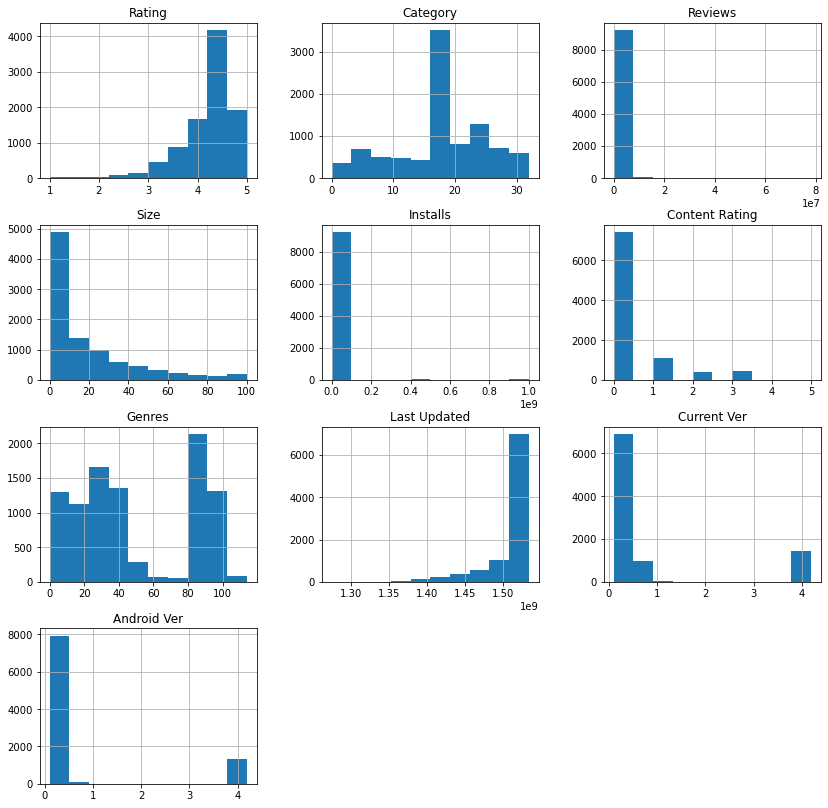

In [110]:
data_df.hist(figsize = (14,14))

<AxesSubplot:>

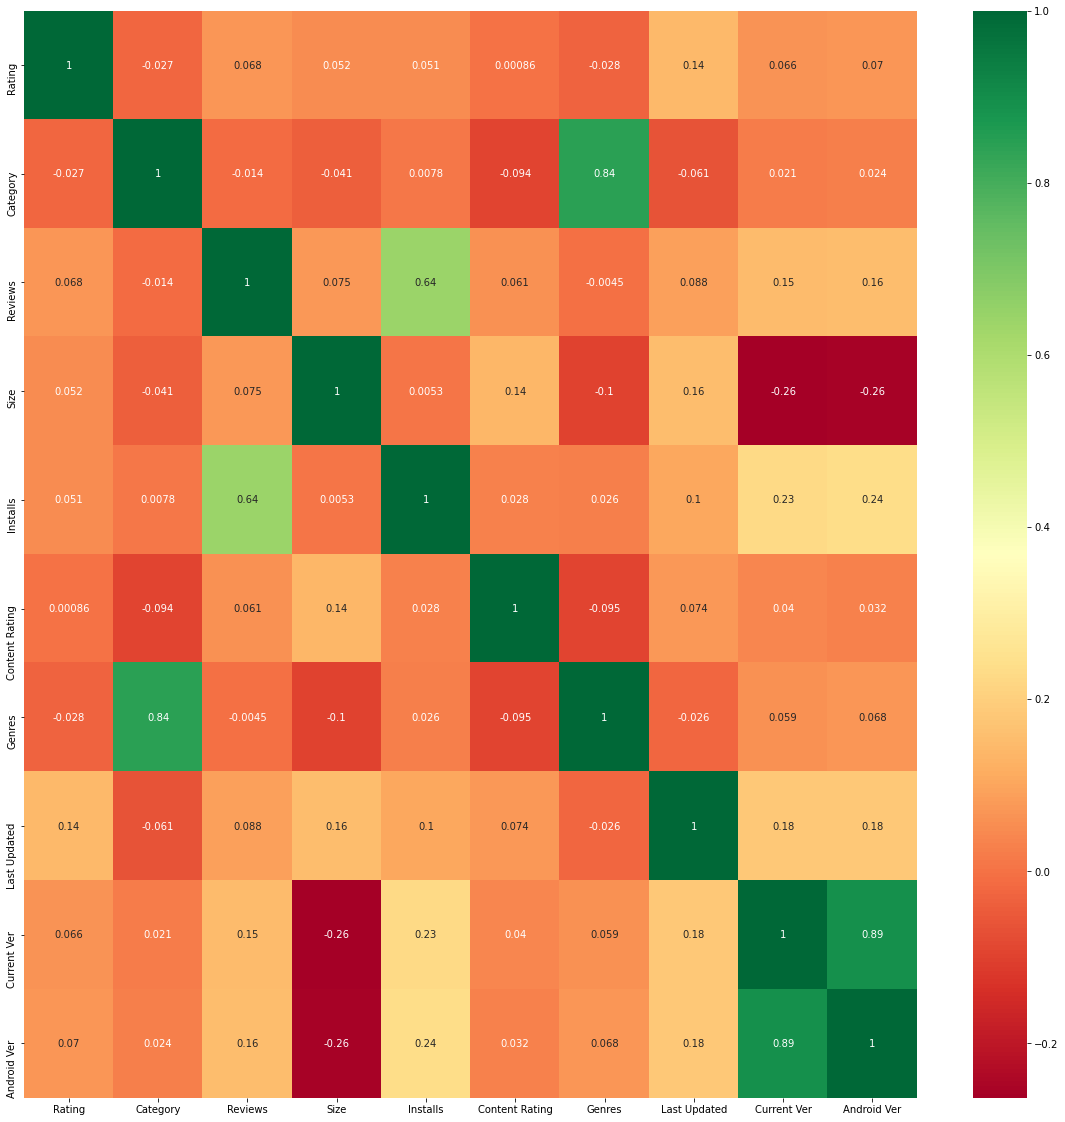

In [111]:
X_f = data_df.iloc[:,0:11]  #independent columns
y_f = data_df.iloc[:,-1]    #target column i.e price range
corrmat = data_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
minmax_scaler = preprocessing.MinMaxScaler()
for column in list(data_df.columns):
    feature = data_df[column].to_numpy().reshape(-1, 1)
    scaled_feature = minmax_scaler.fit_transform(feature)
    data_df.loc[:, column] = scaled_feature

In [113]:
data_df

,Rating,Category,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0.775,0.00000,2.021538e-06,0.189931,9.999000e-06,0.0,0.000000,0.929024,0.000000,0.074050
Coloring book moana,0.725,0.00000,1.235953e-05,0.139927,4.999990e-04,0.0,0.008772,0.931689,0.024439,0.074050
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0.925,0.00000,1.119638e-03,0.086922,4.999999e-03,0.0,0.000000,0.997667,0.005865,0.074050
Sketch - Draw & Paint,0.875,0.00000,2.759054e-03,0.249936,5.000000e-02,0.2,0.000000,0.979673,1.000000,0.078204
Pixel Draw - Number Art Coloring Book,0.825,0.00000,1.235953e-05,0.027917,9.999900e-05,0.0,0.017544,0.983672,0.002444,0.083092
...,...,...,...,...,...,...,...,...,...,...
FR Calculator,0.750,0.56250,7.676727e-08,0.025917,4.990000e-07,0.0,0.105263,0.861380,0.000000,0.075761
Sya9a Maroc - FR,0.875,0.56250,4.733982e-07,0.529960,4.999000e-06,0.0,0.105263,0.873709,0.011731,0.075761
Fr. Mike Schmitz Audio Teachings,1.000,0.56250,3.838364e-08,0.035918,9.900000e-08,0.0,0.105263,0.989004,0.000000,0.075761


In [31]:
def elbowMethod(x):
    score = []
    for cluster in range(1,11):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
        kmeans.fit(x)
        score.append(kmeans.inertia_)
        
    plt.plot(range(1,11), score)
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('wcss')
    plt.show()
    return score

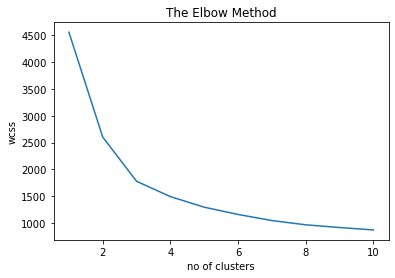

In [32]:
score = elbowMethod(data_df)
kn = KneeLocator(range(1,11), score, curve='convex', direction='decreasing')
PRED_NUM_CLUSTERS = kn.knee

In [33]:
clusterer = KMeans(n_clusters=PRED_NUM_CLUSTERS, random_state=10, algorithm="full")
cluster_labels = clusterer.fit_predict(data_df)

In [34]:
cluster_labels

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [35]:
silhouette_score(data_df, cluster_labels)

0.3905939833386539

In [61]:
data_df

,Rating,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Android Ver
App,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0.775,2.021538e-06,0.189931,9.999000e-06,0.0,0.000000,0.929024,0.074050
Coloring book moana,0.725,1.235953e-05,0.139927,4.999990e-04,0.0,0.008772,0.931689,0.074050
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0.925,1.119638e-03,0.086922,4.999999e-03,0.0,0.000000,0.997667,0.074050
Sketch - Draw & Paint,0.875,2.759054e-03,0.249936,5.000000e-02,0.2,0.000000,0.979673,0.078204
Pixel Draw - Number Art Coloring Book,0.825,1.235953e-05,0.027917,9.999900e-05,0.0,0.017544,0.983672,0.083092
...,...,...,...,...,...,...,...,...
FR Calculator,0.750,7.676727e-08,0.025917,4.990000e-07,0.0,0.105263,0.861380,0.075761
Sya9a Maroc - FR,0.875,4.733982e-07,0.529960,4.999000e-06,0.0,0.105263,0.873709,0.075761
Fr. Mike Schmitz Audio Teachings,1.000,3.838364e-08,0.035918,9.900000e-08,0.0,0.105263,0.989004,0.075761


In [60]:
data_df = data_df.drop("Current Ver", axis=1)
data_df = data_df.drop("Category", axis=1)

In [118]:
pca = PCA(n_components=3, random_state=200, whiten=True)
pca.fit(data_df)

x_train = pca.transform(data_df)

In [124]:
reduced_data_df = pd.DataFrame(x_train)

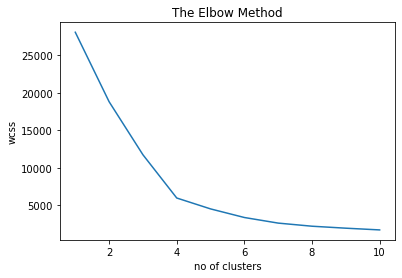

In [67]:
score = elbowMethod(reduced_data_df)
kn = KneeLocator(range(1,11), score, curve='convex', direction='decreasing')
PRED_NUM_CLUSTERS = kn.knee

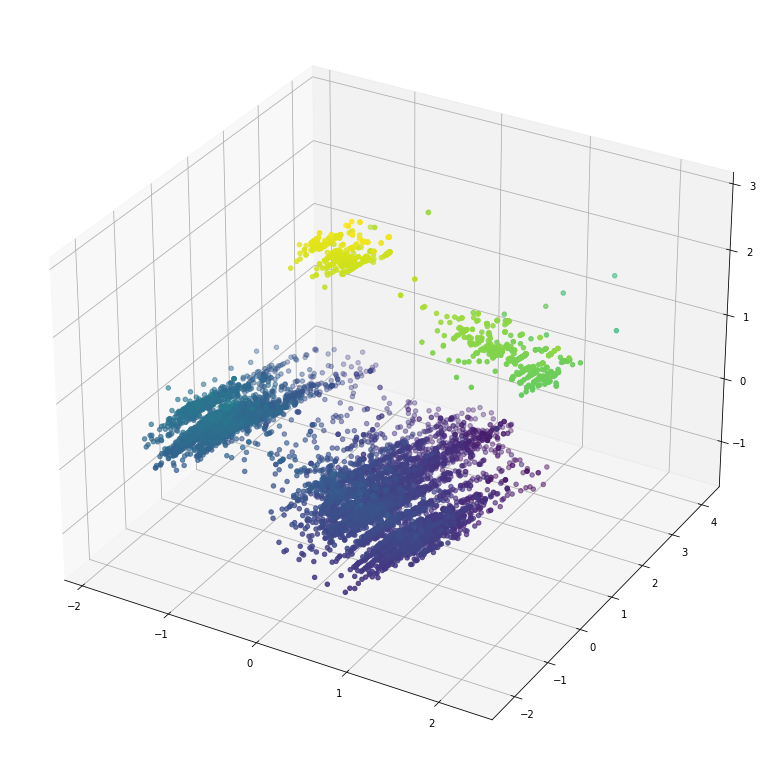

In [64]:
plt.figure(figsize = (14,14))
ax = plt.axes(projection='3d')
zdata = reduced_data_df.iloc[:, 0]
xdata = reduced_data_df.iloc[:, 1]
ydata = reduced_data_df.iloc[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=zdata);

In [72]:
clusterer = KMeans(n_clusters=PRED_NUM_CLUSTERS)
cluster_labels = clusterer.fit_predict(reduced_data_df)
silhouette_score(reduced_data_df, cluster_labels)

0.5716462598769235

In [54]:
data_df.describe()

,Rating,Category,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000
mean,0.797959,0.555712,0.006581,0.196794,0.017909,0.070043,0.436901,0.916209,0.186873,0.201272
std,0.128816,0.229059,0.040239,0.224651,0.091266,0.156710,0.299126,0.132012,0.347333,0.324076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.437500,0.000002,0.041837,0.000010,0.000000,0.166667,0.899034,0.005865,0.073317
50%,0.825000,0.562500,0.000076,0.094923,0.000500,0.000000,0.333333,0.977341,0.031282,0.075761
75%,0.875000,0.718750,0.001044,0.269938,0.005000,0.000000,0.771930,0.995002,0.102888,0.083092
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
clusterer = AgglomerativeClustering(n_clusters=PRED_NUM_CLUSTERS)
cluster_labels = clusterer.fit_predict(reduced_data_df)
silhouette_score(reduced_data_df, cluster_labels)

0.5537870412867014

In [76]:
clusterer = SpectralClustering(n_clusters=PRED_NUM_CLUSTERS)
cluster_labels = clusterer.fit_predict(reduced_data_df)
silhouette_score(reduced_data_df, cluster_labels)

0.5135670431924682

In [81]:
clusterer = DBSCAN()
cluster_labels = clusterer.fit_predict(reduced_data_df)
silhouette_score(reduced_data_df, cluster_labels)

0.4617453373678243

In [114]:
data_df = data_df.drop("Category", axis=1)
data_df = data_df.drop("Size", axis=1)
data_df = data_df.drop("Content Rating", axis=1)
data_df = data_df.drop("Current Ver", axis=1)


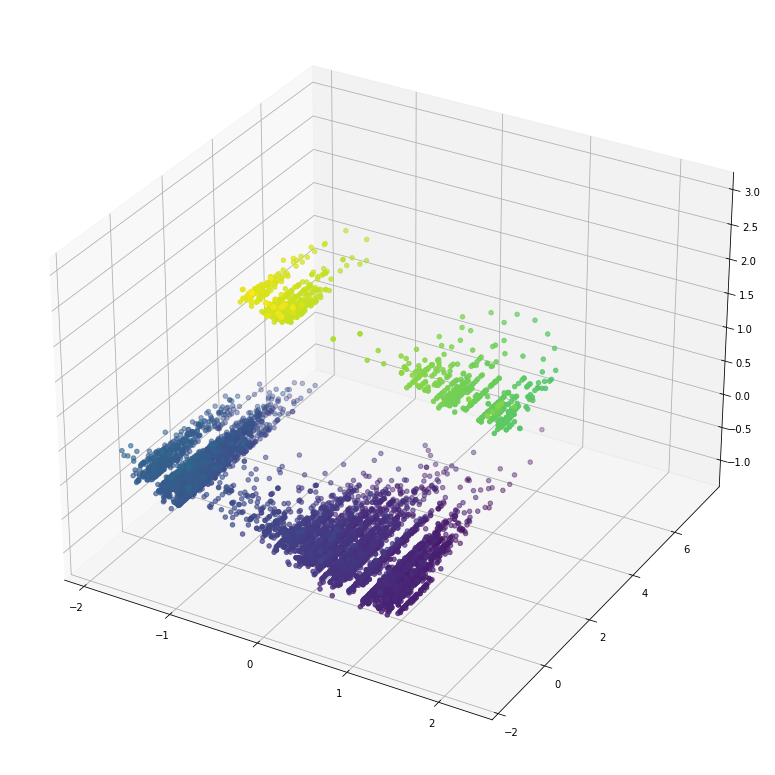

In [125]:
plt.figure(figsize = (14,14))
ax = plt.axes(projection='3d')
zdata = reduced_data_df.iloc[:, 0]
xdata = reduced_data_df.iloc[:, 1]
ydata = reduced_data_df.iloc[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=zdata);

In [138]:
clusterer = DBSCAN()
cluster_labels = clusterer.fit_predict(data_df)
silhouette_score(data_df, cluster_labels)

0.5726695155929021

In [139]:
set(cluster_labels)

{-1, 0, 1, 2, 3, 4, 5, 6}

In [134]:
clusterer = KMeans(n_clusters=4)
cluster_labels = clusterer.fit_predict(reduced_data_df)
silhouette_score(reduced_data_df, cluster_labels)

0.5263145052420046

In [137]:
set(cluster_labels)

{0, 1, 2, 3}